In [2]:
import pandas as pd
from models import (
    ModelEvaluator,
    LinearRegressionModel, LogisticRegressionModel, RandomForestClassifierModel, SVCModel,
    LassoModel, RidgeModel, ElasticNetModel, ElasticNetCVModel, SVRModel, LinearSVCModel,
    DecisionTreeClassifierModel, ExtraTreeClassifierModel, KNeighborsClassifierModel,
    GradientBoostingClassifierModel, KMeansModel, GaussianMixtureModel,
    # These don't work at the moment:
    # DenseModel, RNNModel, LSTMModel, GRUModel
)

df = pd.DataFrame(columns=['LinearRegression', 'LogisticRegressionModel', 'RandomForestClassifierModel', 
                          'SVCModel', 'LassoModel', 'RidgeModel', 'ElasticNetModel', 'ElasticNetCVModel', 'SVRModel', 'LinearSVCModel',
          'DecisionTreeClassifierModel', 'ExtraTreeClassifierModel', 'KNeighborsClassifierModel',
          'GradientBoostingClassifierModel', 'KMeansModel', 'GaussianMixtureModel'])

In [20]:
import pandas as pd

column_names = ['LinearRegression', 'LogisticRegressionModel', 'RandomForestClassifierModel', 
                          'SVCModel', 'LassoModel', 'RidgeModel', 'ElasticNetModel', 'ElasticNetCVModel', 'SVRModel', 'LinearSVCModel',
          'DecisionTreeClassifierModel', 'ExtraTreeClassifierModel', 'KNeighborsClassifierModel',
          'GradientBoostingClassifierModel', 'KMeansModel', 'GaussianMixtureModel']

df = pd.DataFrame(columns=column_names)

In [21]:
df.head()

,LinearRegression,LogisticRegressionModel,RandomForestClassifierModel,SVCModel,LassoModel,RidgeModel,ElasticNetModel,ElasticNetCVModel,SVRModel,LinearSVCModel,DecisionTreeClassifierModel,ExtraTreeClassifierModel,KNeighborsClassifierModel,GradientBoostingClassifierModel,KMeansModel,GaussianMixtureModel


In [ ]:
import warnings

data = pd.read_csv(
        "../feature_extraction/dataOrig.csv",
        usecols=lambda column: column != 'filename'
    )

X = data.iloc[:, :-1]  # the last column is the label
y = data.iloc[:, -1]  # the label

warnings.filterwarnings("ignore")


me = ModelEvaluator(models=[
    LinearRegressionModel, LogisticRegressionModel, RandomForestClassifierModel, SVCModel,
    LassoModel, RidgeModel, ElasticNetModel, ElasticNetCVModel, SVRModel, LinearSVCModel,
    DecisionTreeClassifierModel, ExtraTreeClassifierModel, KNeighborsClassifierModel,
    GradientBoostingClassifierModel, KMeansModel, GaussianMixtureModel,
], X=X, y=y, test_size=0.3, random_state=50)
me.evaluate_models()
results = me.results

In [ ]:
results = me.results

In [15]:
accuracy_scores = [result['accuracy'] for model, result in zip(me.models, results) 
                   if ('StandardScaler' in result['model'])]

In [19]:
print((accuracy_scores))
print(len(me.models))
print([result['model'] for result in results if ('StandardScaler' in result['model'])])

[0.117, 0.718, 0.884, 0.782, 0.048, 0.117, 0.031, 0.075, 0.298, 0.709, 0.846, 0.819, 0.683, 0.883, 0.066, 0.1]
64
['LinearRegressionModel StandardScaler', 'LogisticRegressionModel StandardScaler', 'RandomForestClassifierModel StandardScaler', 'SVCModel StandardScaler', 'LassoModel StandardScaler', 'RidgeModel StandardScaler', 'ElasticNetModel StandardScaler', 'ElasticNetCVModel StandardScaler', 'SVRModel StandardScaler', 'LinearSVCModel StandardScaler', 'DecisionTreeClassifierModel StandardScaler', 'ExtraTreeClassifierModel StandardScaler', 'KNeighborsClassifierModel StandardScaler', 'GradientBoostingClassifierModel StandardScaler', 'KMeansModel StandardScaler', 'GaussianMixtureModel StandardScaler']


In [22]:
df.loc['dataOrig'] = accuracy_scores

,LinearRegression,LogisticRegressionModel,RandomForestClassifierModel,SVCModel,LassoModel,RidgeModel,ElasticNetModel,ElasticNetCVModel,SVRModel,LinearSVCModel,DecisionTreeClassifierModel,ExtraTreeClassifierModel,KNeighborsClassifierModel,GradientBoostingClassifierModel,KMeansModel,GaussianMixtureModel
dataOrig,0.117,0.718,0.884,0.782,0.048,0.117,0.031,0.075,0.298,0.709,0.846,0.819,0.683,0.883,0.066,0.1


In [28]:
import os

directory = '../allDataSets/dataOrigFromLibrosa/preprocessingOutputCSVs'

file_names = [os.path.join(f) for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]


file_paths = [os.path.join(directory, f) for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]

print(file_names)

['dataOrig_rock_country.csv', 'dataOrig_pcaUsingPopAndBlues.csv', 'dataOrig_withoutOutliers.csv', 'dataOrig_pop_disco.csv', 'dataOrig_reducedColumnsBasedOnCorrelationToGenre.csv', 'dataOrig_pop_metal_classical.csv', 'dataOrig_pop_blues.csv', 'dataOrig_pcaUsingAllFeatures.csv', 'dataOrig_genreChangedToNumbers.csv', 'dataOrig_metal_classical.csv', 'dataOrig_pcaUsingMetalAndClassical.csv', 'dataOrig_metal_reggae.csv', 'dataOrig_reducedColumnsRandom.csv', 'dataOrig_reducedColumnsBasedOnCorrelationToEachOther.csv', 'dataOrig_tsneUsingAllFeatures.csv']


In [29]:
for i, currFilePath in enumerate(file_paths):
    data = pd.read_csv(currFilePath,usecols=lambda column: column != 'filename')

    X = data.iloc[:, :-1]  # the last column is the label
    y = data.iloc[:, -1]  # the label

    warnings.filterwarnings("ignore")

    me = ModelEvaluator(models=[
        LinearRegressionModel, LogisticRegressionModel, RandomForestClassifierModel, SVCModel,
        LassoModel, RidgeModel, ElasticNetModel, ElasticNetCVModel, SVRModel, LinearSVCModel,
        DecisionTreeClassifierModel, ExtraTreeClassifierModel, KNeighborsClassifierModel,
        GradientBoostingClassifierModel, KMeansModel, GaussianMixtureModel,
    ], X=X, y=y, test_size=0.3, random_state=50)
    me.evaluate_models()
    results = me.results
    
    accuracy_scores = [result['accuracy'] for model, result in zip(me.models, results) 
                   if ('StandardScaler' in result['model'])]

    df.loc[file_names[i]] = accuracy_scores

In [56]:
df.index = df.index.str.replace('dataOrig_', '')
df.index = df.index.str.replace('.csv', '')
df.head()

,LinearRegression,LogisticRegressionModel,RandomForestClassifierModel,SVCModel,LassoModel,RidgeModel,ElasticNetModel,ElasticNetCVModel,SVRModel,LinearSVCModel,DecisionTreeClassifierModel,ExtraTreeClassifierModel,KNeighborsClassifierModel,GradientBoostingClassifierModel,KMeansModel,GaussianMixtureModel
dataOrig,0.117000,0.718000,0.884000,0.782000,0.048000,0.117000,0.031000,0.075000,0.298000,0.709000,0.846000,0.819000,0.683000,0.883000,0.066000,0.100000
rock_country,0.855000,0.860000,0.950000,0.910000,0.500000,0.855000,0.500000,0.855000,0.955000,0.895000,0.900000,0.845000,0.815000,0.930000,0.435000,0.500000
pcaUsingPopAndBlues,1.000000,1.000000,0.964286,0.978571,0.535714,1.000000,0.535714,1.000000,0.985714,1.000000,0.964286,0.907143,0.964286,0.964286,0.685714,0.535714
withoutOutliers,0.157182,0.737127,0.867209,0.776423,0.116531,0.140921,0.067751,0.128726,0.287263,0.723577,0.840108,0.796748,0.650407,0.875339,0.126016,0.116531
pop_disco,0.930000,0.935000,0.935000,0.940000,0.500000,0.935000,0.500000,0.920000,0.945000,0.955000,0.945000,0.900000,0.860000,0.965000,0.235000,0.500000


In [57]:
csv_file_path = 'allDataOrigFiles_accuracies.csv'

df.to_csv(csv_file_path, index=False)

In [58]:
df.shape

(16, 16)

In [59]:
columns_to_keep = ['RandomForestClassifierModel', 'SVRModel', 'DecisionTreeClassifierModel', 'ExtraTreeClassifierModel', 'KNeighborsClassifierModel', 'GradientBoostingClassifierModel']
#these models are the only models from the entire list that are ideal for categorical data classification

df_categorical_models_only = df[columns_to_keep]
df_categorical_models_only.head()

,RandomForestClassifierModel,SVRModel,DecisionTreeClassifierModel,ExtraTreeClassifierModel,KNeighborsClassifierModel,GradientBoostingClassifierModel
dataOrig,0.884000,0.298000,0.846000,0.819000,0.683000,0.883000
rock_country,0.950000,0.955000,0.900000,0.845000,0.815000,0.930000
pcaUsingPopAndBlues,0.964286,0.985714,0.964286,0.907143,0.964286,0.964286
withoutOutliers,0.867209,0.287263,0.840108,0.796748,0.650407,0.875339
pop_disco,0.935000,0.945000,0.945000,0.900000,0.860000,0.965000


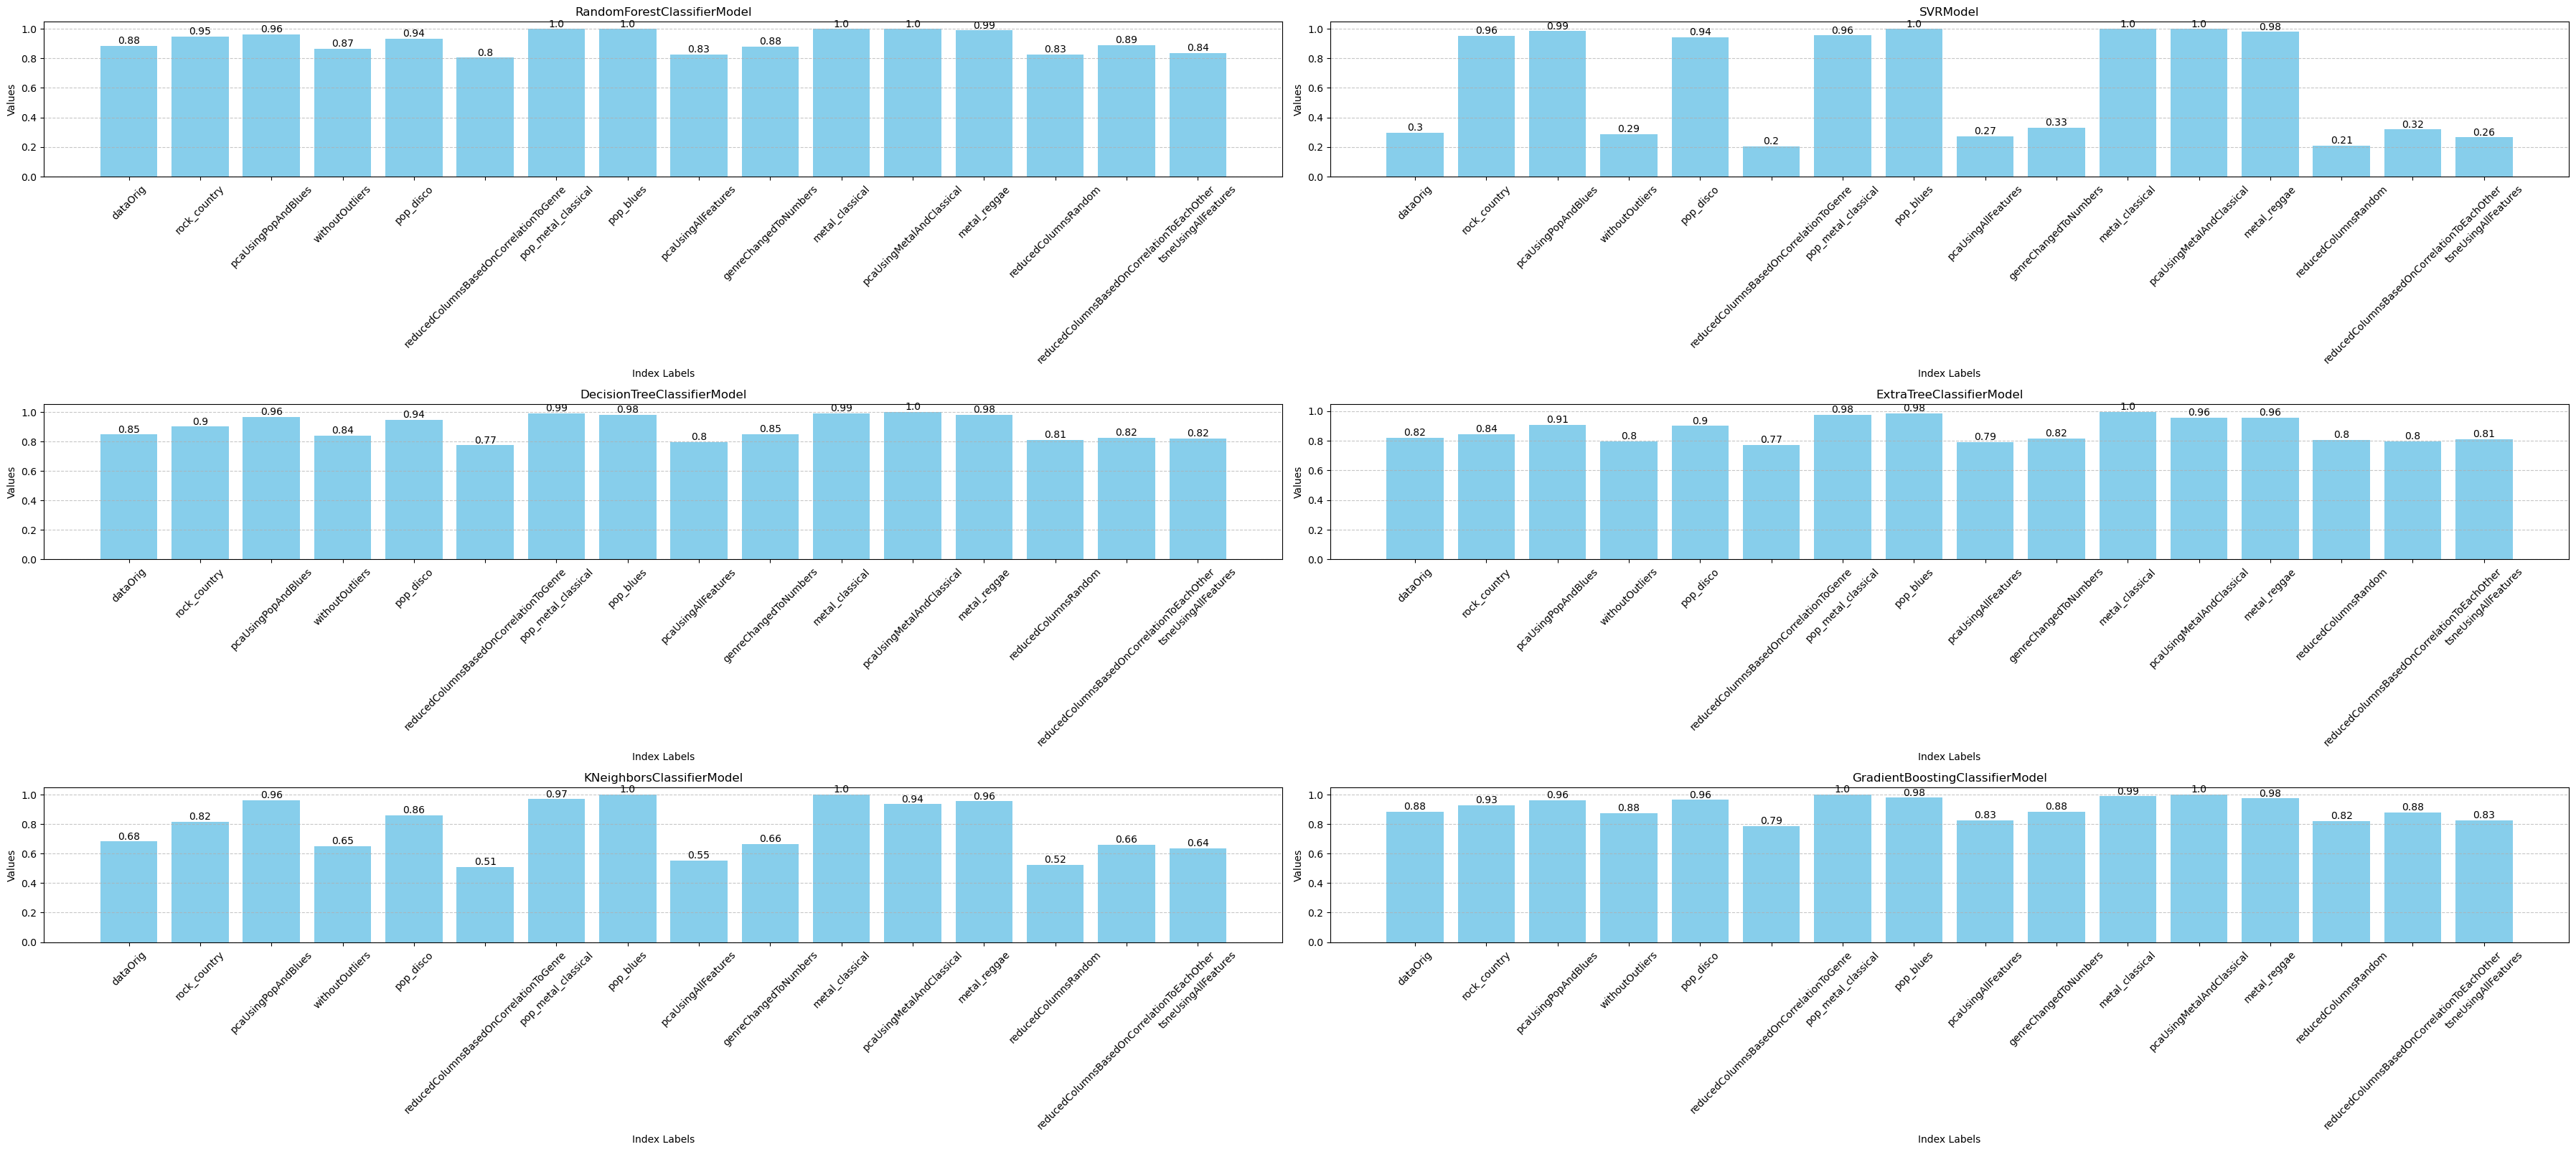

In [61]:
plt.figure(figsize=(36, 40))
for i, col in enumerate(df_categorical_models_only.columns, start=1):
    plt.subplot(8, 2, i)
    bars = plt.bar(df_categorical_models_only.index, df_categorical_models_only[col], color='skyblue')
    plt.title(col)
    plt.xlabel('Index Labels')
    plt.ylabel('Values')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), va='bottom', ha='center')


plt.subplots_adjust(wspace=0.4, hspace=0.2)

plt.tight_layout()
plt.show()

In [69]:
X = df_categorical_models_only.iloc[0, 0]
print(X)

combined_set = set()
for i in range(df_categorical_models_only.shape[0]):
    selected_labels = [label for label, row in df_categorical_models_only.iterrows() if row.iloc[0] - X > 0.05]
    combined_set.update(selected_labels)
print(combined_set)

0.884
{'pop_blues', 'pop_metal_classical', 'pcaUsingPopAndBlues', 'metal_reggae', 'pop_disco', 'rock_country', 'metal_classical', 'pcaUsingMetalAndClassical'}


In [70]:
combined_set = set()
for i in range(df_categorical_models_only.shape[0]):
    selected_labels = [label for label, row in df_categorical_models_only.iterrows() if row.iloc[0] - X < -0.05]
    combined_set.update(selected_labels)
print(combined_set)

{'pcaUsingAllFeatures', 'reducedColumnsRandom', 'reducedColumnsBasedOnCorrelationToGenre'}


In [71]:
combined_set = set()
for i in range(df_categorical_models_only.shape[0]):
    selected_labels = [label for label, row in df_categorical_models_only.iterrows() if (row.iloc[0] - X < 0.05 and row.iloc[0] - X > -0.05)]
    combined_set.update(selected_labels)
print(combined_set)

{'genreChangedToNumbers', 'withoutOutliers', 'tsneUsingAllFeatures', 'reducedColumnsBasedOnCorrelationToEachOther', 'dataOrig'}
